In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r'C:\Users\lenovo\vscode\Hangman_Project\Exploratory-Data-Analysis---Customer-Loans-in-Finance\loan_payments.csv')

In [ ]:
data

In [ ]:
data.head(5)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

In [ ]:
pd.set_option('display.max_rows', None)
data.info()

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage 

In [ ]:
data.describe()

In [ ]:
data['term'].value_counts()

In [ ]:
data['grade'].value_counts()

In [ ]:
data['sub_grade'].value_counts()

In [ ]:
data['application_type'].value_counts()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head(5)

In [ ]:
data['home_ownership'].value_counts()

In [ ]:
data['verification_status'].value_counts()

In [ ]:
data['loan_status'].value_counts()

In [ ]:
data['purpose'].value_counts()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage 

In [ ]:
# Filter rows with null values in 'funded_amount'
null_rows_data = data[data['funded_amount'].isnull()]

In [ ]:
# Calculate the mean of 'funded_amount' (ignoring NaN values)
mean_value_f = data['funded_amount'].mean()

# Fill NaN values in 'funded_amount' with the mean
data['funded_amount'] = data['funded_amount'].fillna(mean_value_f)

In [ ]:
mean_value_f

In [ ]:
data.isnull().sum()

In [ ]:
data.head(5)

In [ ]:
# Calculate the mode of 'funded_amount' (the most frequent value)
mode_value = data['term'].mode()[0]

# Fill NaN values in 'funded_amount' with the mode
data['term'] = data['term'].fillna(mode_value)

In [ ]:
data.head(5)

In [ ]:
data.isnull().sum()

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull())

In [ ]:
# Drop columns 'new' and 'month' from the DataFrame
data = data.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog'])

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Group by 'term' and calculate the mean of 'int_rate'
mean_int_rate = data.groupby('term')['int_rate'].mean()

In [ ]:
mean_int_rate

In [ ]:
# Means for each term
mean_36_months = 12.452135
mean_60_months = 16.635561

# Fill NaN in 'int_rate' based on 'term'
data.loc[(data['term'] == '36 months') & (data['int_rate'].isna()), 'int_rate'] = mean_36_months
data.loc[(data['term'] == '60 months') & (data['int_rate'].isna()), 'int_rate'] = mean_60_months

In [ ]:
data.isnull().sum()

In [ ]:
#fill the null data in next_payment_date with input of one year after last_payment_date
# Convert 'last_payment_date' to datetime objects
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'])

# Now you can add the DateOffset
data['next_payment_date'] = data['last_payment_date'] + pd.DateOffset(years=1)
data.head()

In [ ]:
# Convert to datetime
data['next_payment_date'] = pd.to_datetime(data['next_payment_date'])

# Format to 'Jan-23'
data['next_payment_date'] = data['next_payment_date'].dt.strftime('%b-%y')

In [ ]:
# Convert to datetime
data['last_payment_date'] = pd.to_datetime(data['last_payment_date'])

# Format to 'Jan-23'
data['last_payment_date'] = data['last_payment_date'].dt.strftime('%b-%y')

In [ ]:
data.head(5)

In [ ]:
data.isnull().sum()

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage 

In [ ]:
# Calculate the mode of 'funded_amount' (the most frequent value)
mode_value_e = data['employment_length'].mode()[0]

# Fill NaN values in 'funded_amount' with the mode
data['employment_length'] = data['employment_length'].fillna(mode_value_e)

In [ ]:
null_percentage = (data.isnull().sum()/len(data)*100)
null_percentage 

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Calculate skewness
skewness = data.skew()

In [ ]:
# Define skewness threshold
threshold = 0.80

# Identify skewed columns
skewed_columns = skewness[skewness.abs() > threshold].index

In [ ]:

print("Skewed Columns:")
print(skewed_columns)

In [ ]:
for column in skewed_columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column} (Skew: {skewness[column]:.2f})")
    plt.show()

In [ ]:
import numpy as np
from scipy.stats import boxcox

class DataFrameTransform:
    def __init__(self, data):
        self.data = data

    def reduce_skew(self, column, method="log"):
        """
        Reduces skewness of a specified column using transformations.

        Parameters:
        - column (str): Column to transform.
        - method (str): Transformation method ('log', 'sqrt', 'boxcox', 'log1p').

        Returns:
        - Transformed column (pd.Series).
        """
        col_data = self.data[column]

        if method == "log":
            transformed = np.log(col_data[col_data > 0])
        elif method == "sqrt":
            transformed = np.sqrt(col_data[col_data >= 0])
        elif method == "boxcox":
            if col_data.min() <= 0:
                raise ValueError("Box-Cox requires strictly positive values.")
            transformed, _ = boxcox(col_data)
        elif method == "log1p":
            transformed = np.log1p(col_data[col_data >= 0])
        else:
            raise ValueError("Invalid method. Choose from 'log', 'sqrt', 'boxcox', 'log1p'.")

        return transformed

    def auto_transform_skewed(self, threshold=0.75):
        """
        Identifies skewed columns and applies transformations to reduce skewness.

        Parameters:
        - threshold (float): Skewness threshold above which a column is considered skewed.

        Returns:
        - Updated DataFrame with transformed columns.
        """
        skewness = self.data.skew()
        skewed_columns = skewness[skewness.abs() > threshold].index

        print(f"Skewed Columns: {skewed_columns}")
        
        for column in skewed_columns:
            try:
                print(f"Transforming column: {column}")
                self.data[column] = self.reduce_skew(column, method="log1p")
            except Exception as e:
                print(f"Error transforming column {column}: {e}")

        return self.data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
def visualize_skewness(self, column, before_data, after_data):
        """
        Visualize the skewness of a column before and after transformation.

        Parameters:
        - column (str): Column name.
        - before_data (pd.Series): Column data before transformation.
        - after_data (pd.Series): Column data after transformation.
        """
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Histogram comparison
        sns.histplot(before_data, kde=True, ax=axes[0], color='blue', label='Before')
        sns.histplot(after_data, kde=True, ax=axes[0], color='orange', label='After')
        axes[0].set_title(f"Histogram: {column}")
        axes[0].legend()

        # Boxplot comparison
        sns.boxplot(data=[before_data.dropna(), after_data.dropna()], ax=axes[1])
        axes[1].set_xticklabels(['Before', 'After'])
        axes[1].set_title(f"Boxplot: {column}")

        # Q-Q plot comparison
        probplot(before_data.dropna(), dist="norm", plot=axes[2])
        probplot(after_data.dropna(), dist="norm", plot=axes[2])
        axes[2].set_title(f"Q-Q Plot: {column}")

        plt.tight_layout()
        plt.show()

In [ ]:
def visualize_skewness(self, column, before_data, after_data):
    """
    Visualize the skewness of a column before and after transformation.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogram comparison
    sns.histplot(before_data, kde=True, ax=axes[0], color='blue', label='Before')
    sns.histplot(after_data, kde=True, ax=axes[0], color='orange', label='After')
    axes[0].set_title(f"Histogram: {column}")
    axes[0].legend()

    # Boxplot comparison
    sns.boxplot(data=[before_data.dropna(), after_data.dropna()], ax=axes[1])
    axes[1].set_xticklabels(['Before', 'After'])
    axes[1].set_title(f"Boxplot: {column}")

    # Q-Q plot comparison
    probplot(before_data.dropna(), dist="norm", plot=axes[2])
    probplot(after_data.dropna(), dist="norm", plot=axes[2])
    axes[2].set_title(f"Q-Q Plot: {column}")

    plt.tight_layout()
    plt.show()  # Ensure plots are displayed

In [ ]:
sns.boxplot(x=data['total_rec_int'])

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='term', y='int_rate', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='term', y='loan_amount', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
sns.boxplot(x=data['loan_amount'])

In [ ]:
sns.boxplot(x=data['total_payment'])

In [ ]:
sns.boxplot(x=data['out_prncp'])

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='home_ownership', y='annual_inc', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
sns.boxplot(x=data['annual_inc'])

In [ ]:
import numpy as np

class DataFrameTransform:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def handle_outliers(self, columns, method="remove", threshold=1.5):
        """
        Handles outliers in the specified columns based on the chosen method.

        Parameters:
        - columns (list): List of column names to process.
        - method (str): Method to handle outliers:
            - "remove": Remove rows with outliers.
            - "replace_with_median": Replace outliers with the median.
            - "replace_with_mean": Replace outliers with the mean.
        - threshold (float): Threshold for detecting outliers (e.g., IQR multiplier).
        
        Returns:
        - pd.DataFrame: DataFrame with outliers handled.
        """
        for column in columns:
            if column not in self.dataframe:
                print(f"Column '{column}' not found in DataFrame.")
                continue

            # Compute IQR
            Q1 = self.dataframe[column].quantile(0.25)
            Q3 = self.dataframe[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define outlier bounds
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Identify outliers
            is_outlier = (self.dataframe[column] < lower_bound) | (self.dataframe[column] > upper_bound)

            if method == "remove":
                # Remove rows with outliers
                self.dataframe = self.dataframe[~is_outlier]
            elif method == "replace_with_median":
                # Replace outliers with the median
                median_value = self.dataframe[column].median()
                self.dataframe.loc[is_outlier, column] = median_value
            elif method == "replace_with_mean":
                # Replace outliers with the mean
                mean_value = self.dataframe[column].mean()
                self.dataframe.loc[is_outlier, column] = mean_value
            else:
                raise ValueError(f"Invalid method: {method}. Choose 'remove', 'replace_with_median', or 'replace_with_mean'.")

        return self.dataframe


In [ ]:
transformer = DataFrameTransform(data)

# Handle outliers in 'feature1' and 'feature2' by removing them
data_cleaned = transformer.handle_outliers(columns=['out_prncp', 'total_rec_int', 'last_payment_amount', 'annual_inc', 'loan_amount', 'funded_amount'], method="remove")
print("\nData After Removing Outliers:")
print(data_cleaned)

# Handle outliers by replacing with the median
data_median = transformer.handle_outliers(columns=['out_prncp', 'total_rec_int', 'last_payment_amount', 'annual_inc', 'loan_amount', 'funded_amount'], method="replace_with_median")
print("\nData After Replacing Outliers with Median:")
print(data_median)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare original vs cleaned data
sns.histplot(data['loan_amount'], kde=True, color="blue", label="Original")
sns.histplot(data_cleaned['loan_amount'], kde=True, color="orange", label="Cleaned")
plt.legend()
plt.title("Outlier Handling in Feature1")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare original vs cleaned data
sns.histplot(data['last_payment_amount'], kde=True, color="blue", label="Original")
sns.histplot(data_cleaned['last_payment_amount'], kde=True, color="orange", label="Cleaned")
plt.legend()
plt.title("Outlier Handling in last_payment_amount")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare original vs cleaned data
sns.histplot(data['funded_amount'], kde=True, color="blue", label="Original")
sns.histplot(data_cleaned['funded_amount'], kde=True, color="orange", label="Cleaned")
plt.legend()
plt.title("Outlier Handling in last_payment_amount")
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
def find_highly_correlated_columns(correlation_matrix, threshold=0.85):
    """
    Finds pairs of columns with correlations above a given threshold.

    Parameters:
    - correlation_matrix (pd.DataFrame): Correlation matrix of the dataset.
    - threshold (float): Correlation threshold.

    Returns:
    - list: List of tuples representing highly correlated column pairs.
    """
    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                col1 = correlation_matrix.columns[i]
                col2 = correlation_matrix.columns[j]
                correlated_pairs.append((col1, col2))
    return correlated_pairs

# Identify highly correlated column pairs
highly_correlated = find_highly_correlated_columns(correlation_matrix, threshold=0.85)
print("Highly Correlated Pairs:")
print(highly_correlated)

In [ ]:
def select_columns_to_remove(correlated_pairs):
    """
    Selects columns to remove from a list of highly correlated column pairs.

    Parameters:
    - correlated_pairs (list): List of tuples with correlated column pairs.

    Returns:
    - set: Set of columns to remove.
    """
    columns_to_remove = set()
    for col1, col2 in correlated_pairs:
        # Keep one column and mark the other for removal (arbitrary choice here)
        columns_to_remove.add(col2)
    return columns_to_remove

# Get columns to remove
columns_to_remove = select_columns_to_remove(highly_correlated)
print("Columns to Remove:")
print(columns_to_remove)


In [ ]:
# Drop the identified columns
data_reduced = data.drop(columns=columns_to_remove)
print("Dataset after removing highly correlated columns:")
print(data_reduced)


In [91]:
import pandas as pd


# Calculate total payable and recovered
data['total_payable'] = data['loan_amount'] + (data['loan_amount'] * data['int_rate'] / 100)
recovered_percentage = (data['total_rec_prncp'].sum() / data['total_payable'].sum()) * 100

# Estimate 6-month payments
monthly_payments = data['instalment'].sum()
six_months_payments = monthly_payments * 6

print(f"Recovered Percentage: {recovered_percentage}%")
print(f"Payments in 6 months: {six_months_payments}")


Recovered Percentage: 61.91398458948867%
Payments in 6 months: 129947478.6


In [92]:
# Step 1: Filter loans marked as "Charged Off"
charged_off_loans = data[data['loan_status'] == 'Charged Off']

In [93]:
# Step 2: Calculate the percentage of charged-off loans
total_loans = len(data)
charged_off_count = len(charged_off_loans)
percentage_charged_off = (charged_off_count / total_loans) * 100

#Step 3: Calculate the total amount paid towards charged-off loans
total_paid_charged_off = charged_off_loans['total_payment'].sum()

# Display the results
print(f"Percentage of Charged-Off Loans: {percentage_charged_off:.2f}%")
print(f"Total Amount Paid Towards Charged-Off Loans: ${total_paid_charged_off:.2f}")

Percentage of Charged-Off Loans: 10.17%
Total Amount Paid Towards Charged-Off Loans: $37282284.32


In [102]:
# Step 1: Clean and Convert Columns to Numeric
charged_off_loans['term'] = charged_off_loans['term'].str.extract('(\d+)').astype(int)  # Extract numeric part and convert to integer

# Step 2: Calculate Projected Total Revenue for Charged-Off Loans
charged_off_loans['projected_revenue'] = (charged_off_loans['funded_amount'] * 
    (1 + (charged_off_loans['int_rate'] / 100) * (charged_off_loans['term'] / 12)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\4062655960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['term'] = charged_off_loans['term'].str.extract('(\d+)').astype(int)  # Extract numeric part and convert to integer
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\4062655960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['projected_revenue'] = (charged_off_loans['funded_amount'] *


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\625463644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['projected_loss'] = charged_off_loans['projected_revenue'] - charged_off_loans['total_payment']
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\625463644.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['cumulative_loss'] = charged_off_loans['projected_loss'].cumsum()


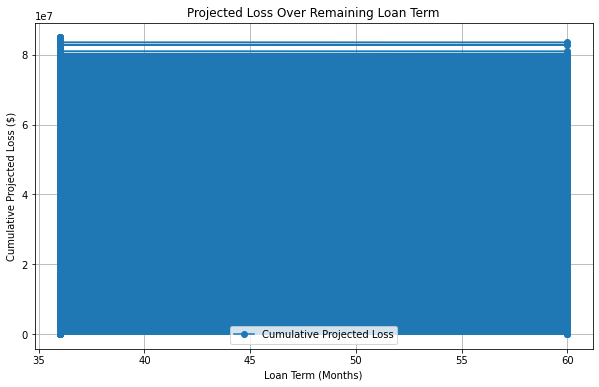

Charged-Off Loans with Projected Loss:
       funded_amount   int_rate  term  total_payment  projected_revenue  \
7       26500.000000  19.990000    36    4182.270000       42392.050000   
56      11200.000000  16.490000    60    1906.510000       20434.400000   
83       1325.000000  17.140000    36     282.780000        2006.315000   
90       8150.000000  19.990000    36    1808.050000       13037.555000   
117      7000.000000  12.990000    36    1654.140000        9727.900000   
138     13229.509117   7.490000    36    1294.640000       16202.179815   
149     13229.509117  14.310000    36    4113.330000       18908.937381   
190     16000.000000  12.990000    60    1432.790000       26392.000000   
209      3000.000000  15.590000    36     521.750000        4403.100000   
314     11200.000000  20.990000    60    2884.140000       22954.400000   
336      3825.000000  17.140000    36     949.200000        5791.815000   
362      9650.000000  16.490000    36    2382.430000       14

In [104]:

# Step 3: Calculate Projected Loss
charged_off_loans['projected_loss'] = charged_off_loans['projected_revenue'] - charged_off_loans['total_payment']

# Step 4: Visualize Projected Loss
# Add a cumulative loss column for plotting
charged_off_loans['cumulative_loss'] = charged_off_loans['projected_loss'].cumsum()

# Plot the projected loss
plt.figure(figsize=(10, 6))
plt.plot(charged_off_loans['term'], charged_off_loans['cumulative_loss'], marker='o', linestyle='-', label='Cumulative Projected Loss')
plt.title('Projected Loss Over Remaining Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Cumulative Projected Loss ($)')
plt.grid()
plt.legend()
plt.show()

# Display results
print("Charged-Off Loans with Projected Loss:")
print(charged_off_loans[['funded_amount', 'int_rate', 'term', 'total_payment', 'projected_revenue', 'projected_loss']])

In [108]:
# Step 2: Identify Late Customers
late_customers = data[data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)'])]

In [109]:
# Step 3: Calculate the Percentage of Late Customers
total_customers = len(data)
late_customers_count = len(late_customers)
percentage_late_customers = (late_customers_count / total_customers) * 100

# Step 4: Calculate Total Amount for Late Customers
total_late_amount = late_customers['funded_amount'].sum()

# Step 5: Calculate Projected Loss if Late Customers Became Charged-Off
late_customers['projected_revenue'] = (
    late_customers['funded_amount'] * 
    (1 + (late_customers['int_rate'] / 100) * (late_customers['term'] / 12))
)
late_customers['projected_loss'] = late_customers['projected_revenue'] - late_customers['total_payment']
total_projected_loss = late_customers['projected_loss'].sum()

# Step 6: Calculate Total Expected Revenue for Late + Charged-Off Customers
charged_off_customers = data[data['loan_status'] == 'Charged Off']
all_risk_customers = pd.concat([late_customers, charged_off_customers])

# Total expected revenue for risk customers (Late + Charged Off)
all_risk_customers['total_revenue'] = (
    all_risk_customers['funded_amount'] * 
    (1 + (all_risk_customers['int_rate'] / 100) * (all_risk_customers['term'] / 12))
)
total_risk_revenue = all_risk_customers['total_revenue'].sum()

# Step 7: Calculate Percentage of Total Expected Revenue Represented by Late + Charged-Off Customers
total_revenue_all_customers = data['funded_amount'].sum() * (1 + (data['int_rate'] / 100) * (data['term'] / 12)).sum()
percentage_risk_revenue = (total_risk_revenue / total_revenue_all_customers) * 100

# Display Results
print(f"Percentage of users behind on payments: {percentage_late_customers:.2f}%")
print(f"Total amount for late customers: ${total_late_amount:.2f}")
print(f"Projected total loss for late customers: ${total_projected_loss:.2f}")
print(f"Total expected revenue from late and charged-off customers: ${total_risk_revenue:.2f}")
print(f"Percentage of total expected revenue from late and charged-off customers: {percentage_risk_revenue:.2f}%")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\4069901396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_customers['projected_revenue'] = (
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16004\4069901396.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_customers['projected_loss'] = late_customers['projected_revenue'] - late_customers['total_payment']


Percentage of users behind on payments: 1.27%
Total amount for late customers: $10222616.84
Projected total loss for late customers: $10189076.52
Total expected revenue from late and charged-off customers: $139351028.38
Percentage of total expected revenue from late and charged-off customers: 0.00%


In [110]:
# Grade distribution for Charged Off and Late loans
charged_off_grade_dist = charged_off_loans['grade'].value_counts(normalize=True)
late_customers_grade_dist = late_customers['grade'].value_counts(normalize=True)

# Print distributions
print("Charged Off Loan Grades:\n", charged_off_grade_dist)
print("\nLate Loan Grades:\n", late_customers_grade_dist)


Charged Off Loan Grades:
 C    0.266545
B    0.232545
D    0.212545
E    0.127273
A    0.076727
F    0.065273
G    0.019091
Name: grade, dtype: float64

Late Loan Grades:
 C    0.271137
B    0.252187
D    0.233236
E    0.137026
F    0.046647
A    0.039359
G    0.020408
Name: grade, dtype: float64


In [111]:
# Purpose distribution for Charged Off and Late loans
charged_off_purpose_dist = charged_off_loans['purpose'].value_counts(normalize=True)
late_customers_purpose_dist = late_customers['purpose'].value_counts(normalize=True)

# Print distributions
print("Charged Off Loan Purpose:\n", charged_off_purpose_dist)
print("\nLate Loan Purpose:\n", late_customers_purpose_dist)


Charged Off Loan Purpose:
 debt_consolidation    0.553636
credit_card           0.158727
other                 0.086364
small_business        0.053818
home_improvement      0.048364
major_purchase        0.030000
car                   0.016182
medical               0.014364
moving                0.011455
house                 0.006909
wedding               0.006909
vacation              0.006545
educational           0.004727
renewable_energy      0.002000
Name: purpose, dtype: float64

Late Loan Purpose:
 debt_consolidation    0.628280
credit_card           0.204082
other                 0.059767
home_improvement      0.052478
small_business        0.014577
major_purchase        0.010204
car                   0.007289
moving                0.007289
medical               0.007289
vacation              0.004373
house                 0.002915
wedding               0.001458
Name: purpose, dtype: float64


In [112]:
# Home Ownership distribution for Charged Off and Late loans
charged_off_home_dist = charged_off_loans['home_ownership'].value_counts(normalize=True)
late_customers_home_dist = late_customers['home_ownership'].value_counts(normalize=True)

# Print distributions
print("Charged Off Loan Home Ownership:\n", charged_off_home_dist)
print("\nLate Loan Home Ownership:\n", late_customers_home_dist)

Charged Off Loan Home Ownership:
 RENT        0.465636
MORTGAGE    0.440182
OWN         0.092545
OTHER       0.001636
Name: home_ownership, dtype: float64

Late Loan Home Ownership:
 RENT        0.450437
MORTGAGE    0.447522
OWN         0.102041
Name: home_ownership, dtype: float64


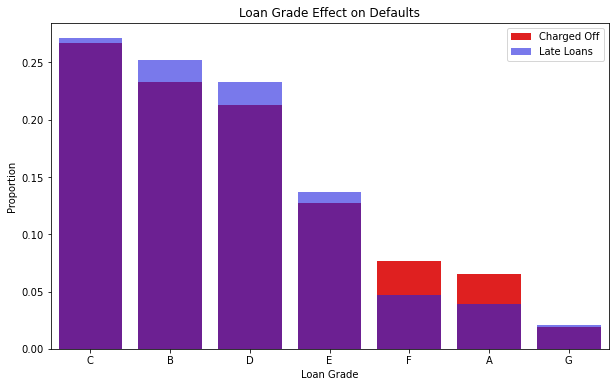

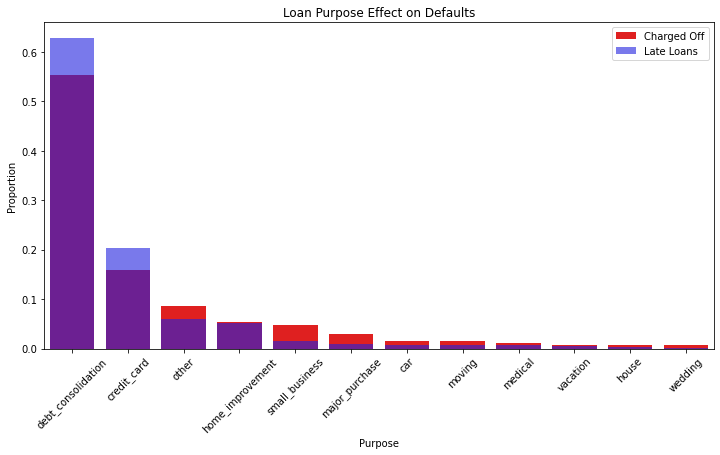

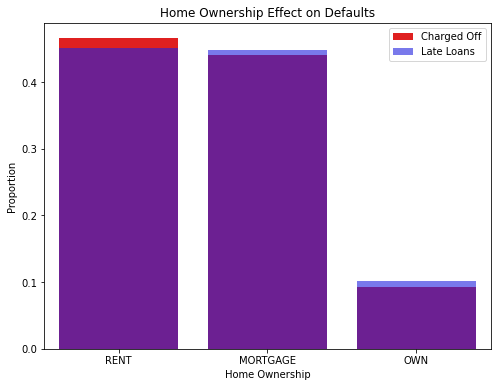

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Loan Grades
plt.figure(figsize=(10, 6))
sns.barplot(x=charged_off_grade_dist.index, y=charged_off_grade_dist.values, color="red", label="Charged Off")
sns.barplot(x=late_customers_grade_dist.index, y=late_customers_grade_dist.values, color="blue", alpha=0.6, label="Late Loans")
plt.title("Loan Grade Effect on Defaults")
plt.ylabel("Proportion")
plt.xlabel("Loan Grade")
plt.legend()
plt.show()

# Visualization for Loan Purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=charged_off_purpose_dist.index, y=charged_off_purpose_dist.values, color="red", label="Charged Off")
sns.barplot(x=late_customers_purpose_dist.index, y=late_customers_purpose_dist.values, color="blue", alpha=0.6, label="Late Loans")
plt.title("Loan Purpose Effect on Defaults")
plt.ylabel("Proportion")
plt.xlabel("Purpose")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Visualization for Home Ownership
plt.figure(figsize=(8, 6))
sns.barplot(x=charged_off_home_dist.index, y=charged_off_home_dist.values, color="red", label="Charged Off")
sns.barplot(x=late_customers_home_dist.index, y=late_customers_home_dist.values, color="blue", alpha=0.6, label="Late Loans")
plt.title("Home Ownership Effect on Defaults")
plt.ylabel("Proportion")
plt.xlabel("Home Ownership")
plt.legend()
plt.show()